In [1]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import dataset

In [ ]:
# Import Anderlecht commune dataset
And_05min_0101_0103_2019 = pd.read_csv('And_05min_0101_0103_2019.csv', header = None)
And_05min_1303_0606_2021 = pd.read_csv('And_05min_1303_0606_2021.csv', header = None)
And_05min_0506_1610_2021 = pd.read_csv('And_05min_0506_1610_2021.csv', header = None)

# Import Brussels region dataset
Bxl_05min_0101_0103_2019 = pd.read_csv('Bxl_05min_0101_0103_2019.csv', header = None)
Bxl_05min_1303_0606_2021 = pd.read_csv('Bxl_05min_1303_0606_2021.csv', header = None)
Bxl_05min_0506_1610_2021 = pd.read_csv('Bxl_05min_0506_1610_2021.csv', header = None)

# Import Belgium country dataset
Bel_05min_0101_0103_2019 = pd.read_csv('Bel_05min_0101_0103_2019.csv', header = None)
Bel_05min_1303_0606_2021 = pd.read_csv('Bel_05min_1303_0606_2021.csv', header = None)
Bel_05min_0506_1610_2021 = pd.read_csv('Bxl_05min_0506_1610_2021.csv', header = None)

In [ ]:
# Function to assign column names to dataset
def assign_col_names(df):
    df.columns = ['Datetime', 'Street_ID', 'Traffic_Count','Traffic_Speed']
    return df

In [ ]:
# Call function to assign column names to dataset
df_list = [And_05min_0101_0103_2019, Bxl_05min_0101_0103_2019, Bel_05min_0101_0103_2019,
          And_05min_1303_0606_2021, Bxl_05min_1303_0606_2021, Bel_05min_1303_0606_2021,
          And_05min_0506_1610_2021, Bxl_05min_0506_1610_2021, Bel_05min_0506_1610_2021]

for i in df_list:
    assign_col_names(i)

## Part 1 Exploration - The number of trucks on each day of the week
#### Data used: Anderlecht, Brussels, and Belgium data (2019 and 2021 data), 5 min temporal resolution

### Anderlecht 

In [ ]:
def process_dataframe(df):
    # Aggregate data to get sum of traffic count (no of trucks)
    new_df = df.sort_values(by=['Datetime']).groupby(['Datetime']).agg({'Traffic_Count':'sum'}).reset_index()
    
    # Get corresponding day of the week from the timeframe
    new_df['DayOfWeek'] = pd.to_datetime(new_df['Datetime']).dt.dayofweek
    
    return new_df

In [ ]:
And_05min_0101_0103_2019_sum = process_dataframe(And_05min_0101_0103_2019)
And_05min_1303_0606_2021_sum = process_dataframe(And_05min_1303_0606_2021)
And_05min_0506_1610_2021_sum = process_dataframe(And_05min_0506_1610_2021)

Bxl_05min_0101_0103_2019_sum = process_dataframe(Bxl_05min_0101_0103_2019)
Bxl_05min_1303_0606_2021_sum = process_dataframe(Bxl_05min_1303_0606_2021)
Bxl_05min_0506_1610_2021_sum = process_dataframe(Bxl_05min_0506_1610_2021)

Bel_05min_0101_0103_2019_sum = process_dataframe(Bel_05min_0101_0103_2019)
Bel_05min_1303_0606_2021_sum = process_dataframe(Bel_05min_1303_0606_2021)
Bel_05min_0506_1610_2021_sum = process_dataframe(Bel_05min_0506_1610_2021)

In [ ]:
# Divide data into several dataframes, one dataframe for each day of the week

for region in ["And", "Bxl", "Bel"]:
    for date_range in ["05min_0101_0103_2019", "05min_1303_0606_2021", "05min_0506_1610_2021"]:
        for day_of_week, day in enumerate(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]):
            exec(f"{region}_{date_range}_{day} = {region}_{date_range}_sum[{region}_{date_range}_sum['DayOfWeek'] == {day_of_week}]")

In [ ]:
days_index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
# Get the sum of traffic count (no of trucks) for each day of the week

for region in ["And", "Bxl", "Bel"]:
    for date_range in ["05min_0101_0103_2019", "05min_1303_0606_2021", "05min_0506_1610_2021"]:
        #for day in ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]:
        exec(f"{region}_{date_range}_days_count = [sum({region}_{date_range}_Mon['Traffic_Count']),sum({region}_{date_range}_Tue['Traffic_Count']), sum({region}_{date_range}_Wed['Traffic_Count']),sum({region}_{date_range}_Thu['Traffic_Count']), sum({region}_{date_range}_Fri['Traffic_Count']),sum({region}_{date_range}_Sat['Traffic_Count']), sum({region}_{date_range}_Sun['Traffic_Count'])]")

Text(0.5, 1.0, 'Anderlecht commune\n Total number of truck (truck count) for each day of the week')

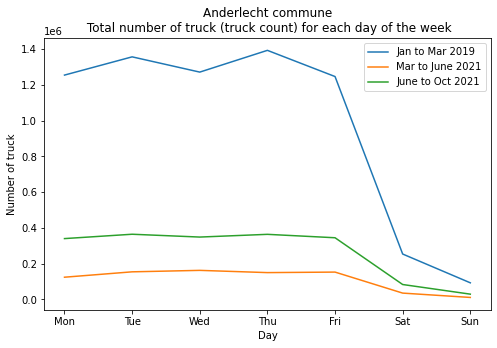

In [ ]:
# Plot figure

plt.figure(figsize=(8,5)) 
plt.plot(days_index, And_05min_0101_0103_2019_days_count, label="Jan to Mar 2019")
plt.plot(days_index, And_05min_1303_0606_2021_days_count, label="Mar to June 2021")
plt.plot(days_index, And_05min_0506_1610_2021_days_count, label="June to Oct 2021")

plt.legend(['Jan to Mar 2019','Mar to June 2021','June to Oct 2021'])
plt.xlabel("Day")
plt.ylabel("Number of truck")
plt.title("Anderlecht commune\n Total number of truck (truck count) for each day of the week")

### Brussels

Text(0.5, 1.0, 'Brussels region\n Total number of truck (truck count) for each day of the week')

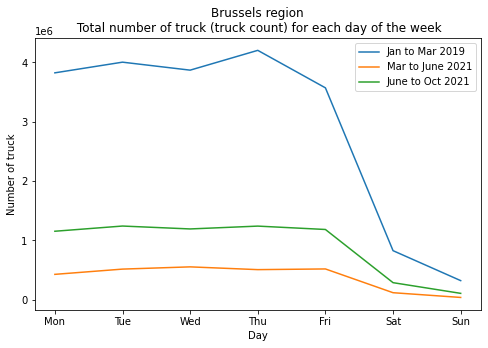

In [ ]:
# Plot figure

plt.figure(figsize=(8,5)) 
plt.plot(days_index, Bxl_05min_0101_0103_2019_days_count, label="Jan to Mar 2019")
plt.plot(days_index, Bxl_05min_1303_0606_2021_days_count, label="Mar to June 2021")
plt.plot(days_index, Bxl_05min_0506_1610_2021_days_count, label="June to Oct 2021")

plt.legend(['Jan to Mar 2019','Mar to June 2021','June to Oct 2021'])
plt.xlabel("Day")
plt.ylabel("Number of truck")
plt.title("Brussels region\n Total number of truck (truck count) for each day of the week")

### Belgium

Text(0.5, 1.0, 'Belgium country\n Total number of truck (truck count) for each day of the week')

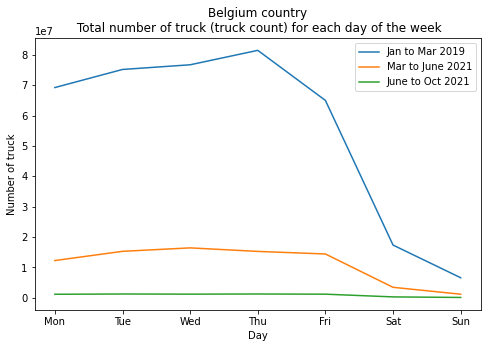

In [ ]:
# Plot figure

plt.figure(figsize=(8,5)) 
plt.plot(days_index, Bel_05min_0101_0103_2019_days_count, label="Jan to Mar 2019")
plt.plot(days_index, Bel_05min_1303_0606_2021_days_count, label="Mar to June 2021")
plt.plot(days_index, Bel_05min_0506_1610_2021_days_count, label="June to Oct 2021")

plt.legend(['Jan to Mar 2019','Mar to June 2021','June to Oct 2021'])
plt.xlabel("Day")
plt.ylabel("Number of truck")
plt.title("Belgium country\n Total number of truck (truck count) for each day of the week")

In [ ]:
# Check number of trucks per day (2019 data)
Bel_05min_0101_0103_2019_days_count

[69218653, 75177572, 76716421, 81467856, 64983361, 17354326, 6594110]

In [ ]:
# Check number of trucks per day (March to June 2021 data)
Bel_05min_1303_0606_2021_days_count

[12256394, 15294694, 16427469, 15264576, 14420098, 3441768, 1177120]

In [ ]:
# Check number of trucks per day (June to Oct 2021 data)
Bel_05min_0506_1610_2021_days_count

[1154430, 1242084, 1193151, 1241046, 1184148, 287843, 107722]

## Part 2 Exploration - The number of trucks in different hours of the day
#### Data used: Belgium data, 5 min temporal resolution

### Jan to March 2019 

In [ ]:
# Extract time from each timeframe
Bel_05min_0101_0103_2019_sum['Time'] =  pd.to_datetime(Bel_05min_0101_0103_2019_sum['Datetime']).dt.time
Bel_05min_0101_0103_2019_sum.head(5)

,Datetime,Traffic_Count,DayOfWeek,Time
0,2019-01-01 00:00:00,437,1,00:00:00
1,2019-01-01 00:05:00,428,1,00:05:00
2,2019-01-01 00:10:00,457,1,00:10:00
3,2019-01-01 00:15:00,503,1,00:15:00
4,2019-01-01 00:20:00,487,1,00:20:00


In [ ]:
# Separate weekdays and weekend data

Bel_05min_0101_0103_2019_Weekdays = Bel_05min_0101_0103_2019_sum[Bel_05min_0101_0103_2019_sum['DayOfWeek'] < 5]
Bel_05min_0101_0103_2019_Saturdays = Bel_05min_0101_0103_2019_sum[Bel_05min_0101_0103_2019_sum['DayOfWeek'] == 5]
Bel_05min_0101_0103_2019_Sundays = Bel_05min_0101_0103_2019_sum[Bel_05min_0101_0103_2019_sum['DayOfWeek'] == 6]

In [ ]:
# Function to assign new column 'mean' to dataset
def add_col_mean(df):
    df.columns = ['mean']
    return df

In [ ]:
# Get the mean of traffic count 

DF_Bel_Weekdays = Bel_05min_0101_0103_2019_Weekdays.groupby('Time').agg({'Traffic_Count':['mean']})
DF_Bel_Saturdays = Bel_05min_0101_0103_2019_Saturdays.groupby('Time').agg({'Traffic_Count':['mean']})
DF_Bel_Sundays = Bel_05min_0101_0103_2019_Sundays.groupby('Time').agg({'Traffic_Count':['mean']})

In [ ]:
# Call function to assign create new column 'mean' to dataset
df_list = [DF_Bel_Weekdays, DF_Bel_Saturdays, DF_Bel_Sundays]

for i in df_list:
    add_col_mean(i)

<Figure size 576x360 with 0 Axes>

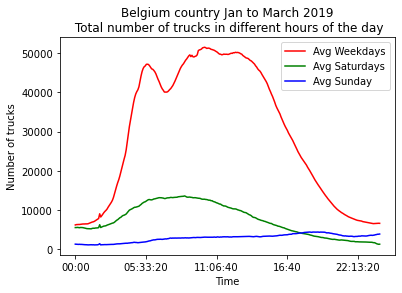

In [ ]:
# Plot figures
plt.figure(figsize=(8,5)) 

DF_Bel_Weekdays['Avg Weekdays'] = DF_Bel_Weekdays[['mean']]
DF_Bel_Saturdays['Avg Saturdays'] = DF_Bel_Saturdays[['mean']]
DF_Bel_Sundays['Avg Sunday'] = DF_Bel_Sundays[['mean']]

ax = DF_Bel_Weekdays[['Avg Weekdays']].plot(color="red", title = 'Belgium country Jan to March 2019\n Total number of trucks in different hours of the day')
DF_Bel_Saturdays[['Avg Saturdays']].plot(ax=ax, color="green")
DF_Bel_Sundays[['Avg Sunday']].plot(ax=ax, color="blue")
plt.ylabel('Number of trucks')

plt.show()

### March to June 2021

In [ ]:
# Extract time from each timeframe
Bel_05min_1303_0606_2021_sum['Time'] =  pd.to_datetime(Bel_05min_1303_0606_2021_sum['Datetime']).dt.time
Bel_05min_1303_0606_2021_sum.head(5)

,Datetime,Traffic_Count,DayOfWeek,Time
0,2021-03-13 11:35:00,1051,5,11:35:00
1,2021-03-13 11:40:00,1297,5,11:40:00
2,2021-03-13 11:45:00,1395,5,11:45:00
3,2021-03-13 11:50:00,1116,5,11:50:00
4,2021-03-13 11:55:00,1244,5,11:55:00


In [ ]:
# Separate weekdays and weekend data

Bel_05min_1303_0606_2021_Weekdays = Bel_05min_1303_0606_2021_sum[Bel_05min_1303_0606_2021_sum['DayOfWeek'] < 5]
Bel_05min_1303_0606_2021_Saturdays = Bel_05min_1303_0606_2021_sum[Bel_05min_1303_0606_2021_sum['DayOfWeek'] == 5]
Bel_05min_1303_0606_2021_Sundays = Bel_05min_1303_0606_2021_sum[Bel_05min_1303_0606_2021_sum['DayOfWeek'] == 6]

In [ ]:
# Get the mean and standard deviation for all data

DF_Bel_Weekdays = Bel_05min_1303_0606_2021_Weekdays.groupby('Time').agg({'Traffic_Count':['mean']})
DF_Bel_Saturdays = Bel_05min_1303_0606_2021_Saturdays.groupby('Time').agg({'Traffic_Count':['mean']})
DF_Bel_Sundays = Bel_05min_1303_0606_2021_Sundays.groupby('Time').agg({'Traffic_Count':['mean']})

In [ ]:
# Call function to assign create new column 'mean' to dataset
df_list = [DF_Bel_Weekdays, DF_Bel_Saturdays, DF_Bel_Sundays]

for i in df_list:
    add_col_mean(i)

<Figure size 576x360 with 0 Axes>

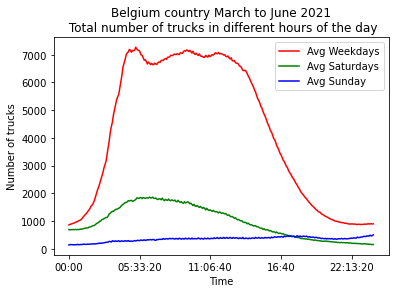

In [ ]:
# Plot figures
plt.figure(figsize=(8,5)) 

DF_Bel_Weekdays['Avg Weekdays'] = DF_Bel_Weekdays[['mean']]
DF_Bel_Saturdays['Avg Saturdays'] = DF_Bel_Saturdays[['mean']]
DF_Bel_Sundays['Avg Sunday'] = DF_Bel_Sundays[['mean']]

ax = DF_Bel_Weekdays[['Avg Weekdays']].plot(color="red", title = 'Belgium country March to June 2021\n Total number of trucks in different hours of the day')
DF_Bel_Saturdays[['Avg Saturdays']].plot(ax=ax, color="green")
DF_Bel_Sundays[['Avg Sunday']].plot(ax=ax, color="blue")
plt.ylabel('Number of trucks')

plt.show()

### June to Oct 2021

In [ ]:
# Extract time from each timeframe
Bel_05min_0506_1610_2021_sum['Time'] =  pd.to_datetime(Bel_05min_0506_1610_2021_sum['Datetime']).dt.time
Bel_05min_0506_1610_2021_sum.head(5)

,Datetime,Traffic_Count,DayOfWeek,Time
0,2021-06-05 00:00:00,27,5,00:00:00
1,2021-06-05 00:05:00,41,5,00:05:00
2,2021-06-05 00:10:00,31,5,00:10:00
3,2021-06-05 00:15:00,31,5,00:15:00
4,2021-06-05 00:20:00,24,5,00:20:00


In [ ]:
# Separate weekdays and weekend data

Bel_05min_0506_1610_2021_Weekdays = Bel_05min_0506_1610_2021_sum[Bel_05min_0506_1610_2021_sum['DayOfWeek'] < 5]
Bel_05min_0506_1610_2021_Saturdays = Bel_05min_0506_1610_2021_sum[Bel_05min_0506_1610_2021_sum['DayOfWeek'] == 5]
Bel_05min_0506_1610_2021_Sundays = Bel_05min_0506_1610_2021_sum[Bel_05min_0506_1610_2021_sum['DayOfWeek'] == 6]

In [ ]:
# Get the mean and standard deviation for all data

DF_Bel_Weekdays = Bel_05min_0506_1610_2021_Weekdays.groupby('Time').agg({'Traffic_Count':['mean']})
DF_Bel_Saturdays = Bel_05min_0506_1610_2021_Saturdays.groupby('Time').agg({'Traffic_Count':['mean']})
DF_Bel_Sundays = Bel_05min_0506_1610_2021_Sundays.groupby('Time').agg({'Traffic_Count':['mean']})

In [ ]:
# Call function to assign create new column 'mean' to dataset
df_list = [DF_Bel_Weekdays, DF_Bel_Saturdays, DF_Bel_Sundays]

for i in df_list:
    add_col_mean(i)

<Figure size 576x360 with 0 Axes>

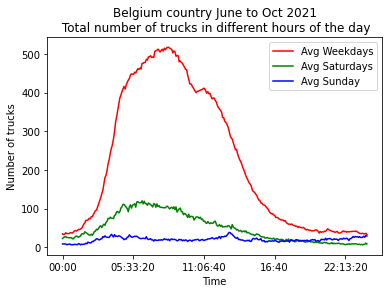

In [ ]:
# Plot figures
plt.figure(figsize=(8,5)) 

DF_Bel_Weekdays['Avg Weekdays'] = DF_Bel_Weekdays[['mean']]
DF_Bel_Saturdays['Avg Saturdays'] = DF_Bel_Saturdays[['mean']]
DF_Bel_Sundays['Avg Sunday'] = DF_Bel_Sundays[['mean']]

ax = DF_Bel_Weekdays[['Avg Weekdays']].plot(color="red", title = 'Belgium country June to Oct 2021\n Total number of trucks in different hours of the day')
DF_Bel_Saturdays[['Avg Saturdays']].plot(ax=ax, color="green")
DF_Bel_Sundays[['Avg Sunday']].plot(ax=ax, color="blue")
plt.ylabel('Number of trucks')

plt.show()